In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.getcwd()

'/Users/alvastrand/Documents/OU/Research/notebooks'

In [3]:
path = '/Users/alvastrand/Documents/OU/Research/'
os.chdir(path)

In [4]:
os.getcwd()

'/Users/alvastrand/Documents/OU/Research'

In [5]:
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)

In [6]:
subdir = 'data/BirdLife/'
filename = 'migration_distance_birdlife_west-hem.txt'
df_b = pd.read_csv(subdir + filename, sep='\t')

In [7]:
df_b.head(2)

,scientific,LON.b,LAT.b,LON.nb,LAT.nb,MAX.LAT.nb,distance,intersect
0,Abeillia abeillei,-90.500000,15.543646,-90.500000,15.543646,19.849085,0.0,1.0
1,Aburria aburri,-75.227941,-1.987264,-75.227941,-1.987264,11.022187,0.0,1.0


In [8]:
df_b = df_b.rename(columns={'scientific': 'scientific_name'})

In [9]:
# subdir = 'data/checklists/'
# filename = 'Clements-Checklist-v2019-August-2019.csv'
# df_c = pd.read_csv(subdir + filename)

In [10]:
# subdir = 'data/checklists/'
# filename = 'eBird_Taxonomy_v2019.csv'
# df_e = pd.read_csv(subdir + filename)

In [11]:
# df_e.head(2)

In [12]:
# df_e = df_e.rename(columns={'SCI_NAME': 'scientific_name'})

In [13]:
# subdir = 'data/checklists/'
# filename = 'eBird-Clements-v2019-integrated-checklist-August-2019.csv'
# df_e_c = pd.read_csv(subdir + filename)

In [14]:
subdir = 'data/checklists/'
filename = 'NACC_list_species.csv'
df_n = pd.read_csv(subdir + filename)

In [15]:
df_n.head(2)

,id,avibase id,rank,common_name,french_name,order,family,subfamily,genus,species,annotation,status_accidental,status_hawaiian,status_introduced,status_nonbreeding,status_extinct,status_misplaced
0,2,66C31E09F8C285D6,species,Highland Tinamou,Tinamou de Bonaparte,Tinamiformes,Tinamidae,NaN,Nothocercus,Nothocercus bonapartei,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,42D72AE118D2DE82,species,Great Tinamou,Grand Tinamou,Tinamiformes,Tinamidae,NaN,Tinamus,Tinamus major,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_n = df_n.rename(columns={'species': 'scientific_name'})

In [17]:
# path_output = 'data/Handbook/'
path_output = 'data/output/'

# filename = 'migratory_species.csv'
# Body masses that I calculated
filename = 'all_obligate_aerial_insectivores_body_masses.csv'

df_h = pd.read_csv(path_output + filename)

In [18]:
len(df_h)

38

In [19]:
df_h.head(2)

,scientific_name,common_name,scientific_name_handbook,common_name_handbook,sex,n,mean,sum_products_n_mean,sum_n,weighted_mean,mean_all,mean_reported_by_kyle_horton,error
0,Aeronautes saxatalis,White-throated Swift,Aeronautes saxatalis,White-throated Swift,U,20.0,32.1,NaN,NaN,32.1,32.1,32.1,NaN
1,Chaetura pelagica,Chimney Swift,Chaetura pelagica,Chimney Swift,U,1805.0,23.6,NaN,NaN,23.6,23.6,23.6,NaN


In [20]:
# df_h = df_h.rename(columns={'Scientific': 'scientific_name'})

In [21]:
df_h = df_h.dropna(subset=['weighted_mean'])

In [22]:
df_h = df_h[['scientific_name', 'common_name', 'weighted_mean']]

In [23]:
df_h = df_h.rename(columns={'weighted_mean': 'body_mass'})

In [24]:
df_h.head(2)

,scientific_name,common_name,body_mass
0,Aeronautes saxatalis,White-throated Swift,32.1
1,Chaetura pelagica,Chimney Swift,23.6


In [25]:
df_b_n = df_b.merge(df_n, on='scientific_name')

In [26]:
print(len(df_b))
print(len(df_n))
print(len(df_b_n))

print(len(df_b)-len(df_b_n))
# There are 2,991 species that are not in the Birds of North and Middle America Checklist (produced by the North 
# American Classification and Nomenclature Committee (NACC)). These could be South American species.

4785
2154
1794
2991


In [27]:
df_b_n.head(2)

,scientific_name,LON.b,LAT.b,LON.nb,LAT.nb,MAX.LAT.nb,distance,intersect,id,avibase id,rank,common_name,french_name,order,family,subfamily,genus,annotation,status_accidental,status_hawaiian,status_introduced,status_nonbreeding,status_extinct,status_misplaced
0,Abeillia abeillei,-90.50,15.543646,-90.50,15.543646,19.849085,0.0,1.0,788,B3F5E5E222C2694B,species,Emerald-chinned Hummingbird,Colibri d'Abeillé,Apodiformes,Trochilidae,Trochilinae,Abeillia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acanthidops bairdi,-83.75,9.751677,-83.75,9.751677,10.513218,0.0,1.0,1976,5CCF7540501E4A68,species,Peg-billed Finch,Bec-en-cheville gris,Passeriformes,Thraupidae,Diglossinae,Acanthidops,Monotypic.,NaN,NaN,NaN,NaN,NaN,*


In [28]:
# df_b_e = df_b.merge(df_e, on='scientific_name')

# print(len(df_b))
# print(len(df_e))
# print(len(df_b_e))

# print(len(df_b)-len(df_b_e))
# # Why are 510 species missing from the 2019 eBird taxonomy?

# df_b_e = df_b_e.rename(columns={'FAMILY': 'family'})

In [29]:
# print(len(df_b_n[df_b_n['family'].str.contains('Caprimulgidae')]))
# print(len(df_b_n[df_b_n['family'].str.contains('Apodidae')]))
# print(len(df_b_n[df_b_n['family'].str.contains('Hirundinidae')]))

In [30]:
subdir = 'data/Birds_of_North_America/'
filename = 'obligate_aerial_insectivores_birds_of_north_america.csv'
df_bna = pd.read_csv(subdir + filename)

I scraped these data off of Birds of North America (now Birds of the World).

In [31]:
df_bna.rename(columns={'order': 'order_birds_of_north_america'}, inplace=True)

In [32]:
len(df_bna)

21

In [33]:
df_bna.head(2)

,order_birds_of_north_america,family,common_name,scientific_name
0,Caprimulgiformes,Caprimulgidae,Lesser Nighthawk,Chordeiles acutipennis
1,Caprimulgiformes,Caprimulgidae,Common Nighthawk,Chordeiles minor


In [34]:
df_b_n_bna = df_b_n.merge(df_bna, on=['scientific_name', 'common_name', 'family'])

In [35]:
len(df_b_n_bna)

21

In [36]:
df_b_n_bna.head(2)

,scientific_name,LON.b,LAT.b,LON.nb,LAT.nb,MAX.LAT.nb,distance,intersect,id,avibase id,rank,common_name,french_name,order,family,subfamily,genus,annotation,status_accidental,status_hawaiian,status_introduced,status_nonbreeding,status_extinct,status_misplaced,order_birds_of_north_america
0,Aeronautes saxatalis,-108.698701,32.448050,-105.931063,26.265097,39.513228,736.046352,0.586364,755,B401C2DDB3ED732D,species,White-throated Swift,Martinet à gorge blanche,Apodiformes,Apodidae,Apodinae,Aeronautes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes
1,Antrostomus arizonae,-103.398915,24.849878,-100.202682,20.712022,28.631368,563.581341,0.625247,2061,CED2468C3EF9B42C,species,Mexican Whip-poor-will,Engoulevent d'Arizona,Caprimulgiformes,Caprimulgidae,Caprimulginae,Antrostomus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes


In [37]:
df_b_n_bna[
    df_b_n_bna['order'] != df_b_n_bna['order_birds_of_north_america']][['scientific_name', 'common_name', 'order', 
                                                                        'order_birds_of_north_america']]

,scientific_name,common_name,order,order_birds_of_north_america
0,Aeronautes saxatalis,White-throated Swift,Apodiformes,Caprimulgiformes
5,Chaetura pelagica,Chimney Swift,Apodiformes,Caprimulgiformes
6,Chaetura vauxi,Vaux's Swift,Apodiformes,Caprimulgiformes
10,Cypseloides niger,Black Swift,Apodiformes,Caprimulgiformes


In [38]:
df_a_i_na = df_b_n_bna[df_b_n_bna['distance'] > 0]

In [39]:
len(df_a_i_na)

19

In [40]:
# Species that migrate.
df_a_i_na.head(2)

,scientific_name,LON.b,LAT.b,LON.nb,LAT.nb,MAX.LAT.nb,distance,intersect,id,avibase id,rank,common_name,french_name,order,family,subfamily,genus,annotation,status_accidental,status_hawaiian,status_introduced,status_nonbreeding,status_extinct,status_misplaced,order_birds_of_north_america
0,Aeronautes saxatalis,-108.698701,32.448050,-105.931063,26.265097,39.513228,736.046352,0.586364,755,B401C2DDB3ED732D,species,White-throated Swift,Martinet à gorge blanche,Apodiformes,Apodidae,Apodinae,Aeronautes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes
1,Antrostomus arizonae,-103.398915,24.849878,-100.202682,20.712022,28.631368,563.581341,0.625247,2061,CED2468C3EF9B42C,species,Mexican Whip-poor-will,Engoulevent d'Arizona,Caprimulgiformes,Caprimulgidae,Caprimulginae,Antrostomus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes


In [41]:
# Species that do not migrate.
list(set(df_b_n_bna['common_name']).difference(df_a_i_na['common_name']))

['Common Pauraque', 'Antillean Nighthawk']

In [42]:
# subdir = 'data/output/'
# filename = 'all_obligate_aerial_insectivores_birdlife_nacc_north_america.csv'
# df_b_n_bna.to_csv(subdir + filename, index=False)

In [43]:
# subdir = 'data/output/'
# filename = 'obligate_aerial_insectivores_birdlife_nacc_north_america.csv'
# df_a_i_na.to_csv(subdir + filename, index=False)

In [44]:
def plot_dist_lat(df):
    # Plot histogram of migration distances.
    df['distance'].hist()
    plt.title('Histogram of migration distances')
    plt.show()
    # Plot migration distance as a function of the latitude of the centroid of the wintering range.
    df = df.rename(columns={'LAT.nb': 'Latitude of the centroid of the wintering range', 
                       'distance': 'Migration distance (km)'})
    df.plot('Latitude of the centroid of the wintering range', 'Migration distance (km)', kind='scatter')
    plt.title('Migration distance as a function of the latitude of the centroid of the wintering range')
    plt.show()
    df = df.rename(columns={'Latitude of the centroid of the wintering range': 'LAT.nb', 
                       'Migration distance (km)': 'distance'})

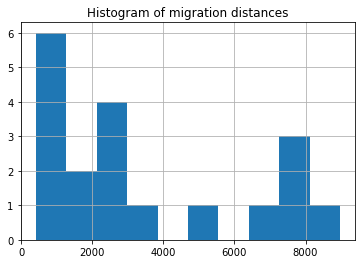

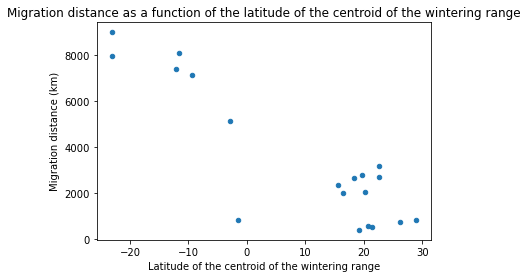

In [45]:
# Aerial insectivores in North America
plot_dist_lat(df_a_i_na)

In [46]:
# Lesser Nighthawk is an outlier.
df_a_i_na[(df_a_i_na['LAT.nb'] < 0) & (df_a_i_na['distance'] < 2000)]

,scientific_name,LON.b,LAT.b,LON.nb,LAT.nb,MAX.LAT.nb,distance,intersect,id,avibase id,rank,common_name,french_name,order,family,subfamily,genus,annotation,status_accidental,status_hawaiian,status_introduced,status_nonbreeding,status_extinct,status_misplaced,order_birds_of_north_america
7,Chordeiles acutipennis,-69.084039,2.992658,-63.094887,-1.430223,28.063228,826.667796,0.858728,708,9690689D23AEC109,species,Lesser Nighthawk,Engoulevent minime,Caprimulgiformes,Caprimulgidae,Chordeilinae,Chordeiles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes


In [47]:
# field_names = ['scientific_name']
field_names = ['scientific_name', 'common_name']

df_a_i_na_h = df_a_i_na.merge(df_h, on=field_names)

In [48]:
# North America
print(len(df_a_i_na))
print(len(df_h))
print(len(df_a_i_na_h))

print(len(df_a_i_na)-len(df_a_i_na_h))

19
20
18
1


In [49]:
df_a_i_na_h.head(2)

,scientific_name,LON.b,LAT.b,LON.nb,LAT.nb,MAX.LAT.nb,distance,intersect,id,avibase id,rank,common_name,french_name,order,family,subfamily,genus,annotation,status_accidental,status_hawaiian,status_introduced,status_nonbreeding,status_extinct,status_misplaced,order_birds_of_north_america,body_mass
0,Aeronautes saxatalis,-108.698701,32.448050,-105.931063,26.265097,39.513228,736.046352,0.586364,755,B401C2DDB3ED732D,species,White-throated Swift,Martinet à gorge blanche,Apodiformes,Apodidae,Apodinae,Aeronautes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes,32.1
1,Antrostomus carolinensis,-88.058904,34.063816,-83.140011,16.459749,30.354784,2011.374172,0.049623,718,8D3E887123F5C670,species,Chuck-will's-widow,Engoulevent de Caroline,Caprimulgiformes,Caprimulgidae,Caprimulginae,Antrostomus,Monotypic.,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes,109.0


In [50]:
list(set(df_h['common_name'].unique()).difference(df_a_i_na['common_name']))

['Common Pauraque', 'Antillean Nighthawk']

In [51]:
list(set(df_a_i_na['common_name'].unique()).difference(df_h['common_name']))

['Mexican Whip-poor-will']

In [52]:
df_a_i_na_h.columns

# migratory_species.csv:
# What does SpecLevel mean?

Index(['scientific_name', 'LON.b', 'LAT.b', 'LON.nb', 'LAT.nb', 'MAX.LAT.nb',
       'distance', 'intersect', 'id', 'avibase id', 'rank', 'common_name',
       'french_name', 'order', 'family', 'subfamily', 'genus', 'annotation',
       'status_accidental', 'status_hawaiian', 'status_introduced',
       'status_nonbreeding', 'status_extinct', 'status_misplaced',
       'order_birds_of_north_america', 'body_mass'],
      dtype='object')

In [53]:
# body_mass_field_name = 'BodyMass.Value'
body_mass_field_name = 'body_mass'

df_a_i_na_h[['common_name', body_mass_field_name]].sort_values(by=body_mass_field_name, ascending=False)

,common_name,body_mass
1,Chuck-will's-widow,109.000000
7,Common Nighthawk,79.300000
13,Purple Martin,53.814439
3,Eastern Whip-poor-will,53.400000
12,Common Poorwill,48.120000
2,Buff-collared Nightjar,48.000000
6,Lesser Nighthawk,47.754000
8,Black Swift,41.368657
0,White-throated Swift,32.100000
10,Cave Swallow,24.127511


In [54]:
def plot_dist_lat_masses(df):
    # Plot histogram of body masses.
    df[body_mass_field_name].hist()
    plt.title('Histogram of body masses')
    plt.show()
    # Plot migration distance as a function of body mass.
    df.rename(columns={body_mass_field_name: 'Body mass (g)', 'distance': 'Migration distance (km)'}, inplace=True)
    df.plot.scatter('Body mass (g)', 'Migration distance (km)', s=50)
    plt.title('Migration distance as a function of body mass')
    plt.show()
    # Plot migration distance as a function of the latitude of the centroid of the wintering range.
    df.rename(columns={'LAT.nb': 'Latitude of the centroid of the wintering range'}, inplace=True)
    df.plot.scatter('Latitude of the centroid of the wintering range', 'Migration distance (km)', s=50, 
                    c='Body mass (g)', 
                    colormap='viridis', sharex=False)
    plt.title('Migration distance as a function of the latitude of the centroid of the wintering range')
    plt.show()
    df.rename(columns={'Body mass (g)': body_mass_field_name, 'Migration distance (km)': 'distance', 
                       'Latitude of the centroid of the wintering range': 'LAT.nb'}, inplace=True)

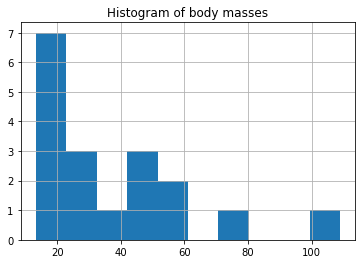

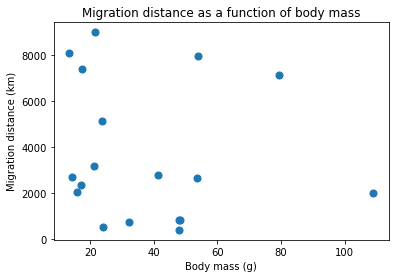

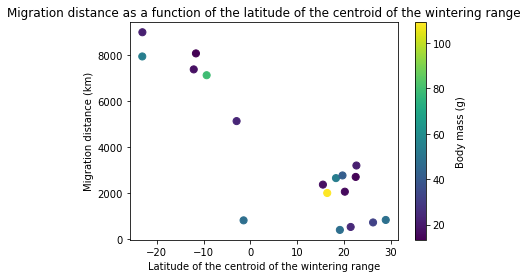

In [55]:
plot_dist_lat_masses(df_a_i_na_h)

In [56]:
df_not_in_h_na = df_a_i_na[df_a_i_na['common_name'].isin(
    list(set(list(df_a_i_na['common_name'])) - set(list(df_a_i_na_h['common_name'])))
)]

# .reset_index(drop=True)

In [57]:
df_not_in_h_na

,scientific_name,LON.b,LAT.b,LON.nb,LAT.nb,MAX.LAT.nb,distance,intersect,id,avibase id,rank,common_name,french_name,order,family,subfamily,genus,annotation,status_accidental,status_hawaiian,status_introduced,status_nonbreeding,status_extinct,status_misplaced,order_birds_of_north_america
1,Antrostomus arizonae,-103.398915,24.849878,-100.202682,20.712022,28.631368,563.581341,0.625247,2061,CED2468C3EF9B42C,species,Mexican Whip-poor-will,Engoulevent d'Arizona,Caprimulgiformes,Caprimulgidae,Caprimulginae,Antrostomus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes


In [58]:
# migratory_species.csv

# Calculated a weighted average when body masses were reported for both males and females.
# (50.3+56.5)/2
# (15*47.2+10*49.5)/(15+10)

# list_masses_not_in_h_na = [np.nan, 109, 48, 53.4, 48.12]
list_masses_not_in_h_na = [np.nan]

In [59]:
df_not_in_h_na[body_mass_field_name] = list_masses_not_in_h_na

/Users/alvastrand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
df_not_in_h_na[['common_name', 'scientific_name', body_mass_field_name]]

,common_name,scientific_name,body_mass
1,Mexican Whip-poor-will,Antrostomus arizonae,NaN


In [61]:
# df_a_i_na_h_fewer = df_a_i_na.merge(df_h[['scientific_name', body_mass_field_name]], on='scientific_name')

In [62]:
# df_a_i_na_h_added = df_a_i_na_h_fewer.append(df_not_in_h_na)
df_a_i_na_h_added = df_a_i_na_h.append(df_not_in_h_na)

In [63]:
len(df_a_i_na_h_added)

19

In [64]:
df_a_i_na_h_added[['common_name', body_mass_field_name]].sort_values(by=body_mass_field_name, ascending=False)

,common_name,body_mass
1,Chuck-will's-widow,109.000000
7,Common Nighthawk,79.300000
13,Purple Martin,53.814439
3,Eastern Whip-poor-will,53.400000
12,Common Poorwill,48.120000
2,Buff-collared Nightjar,48.000000
6,Lesser Nighthawk,47.754000
8,Black Swift,41.368657
0,White-throated Swift,32.100000
10,Cave Swallow,24.127511


In [65]:
print(df_a_i_na_h_added[body_mass_field_name].mean())
print(df_a_i_na_h_added[body_mass_field_name].median())

37.83631754277779
28.11375536


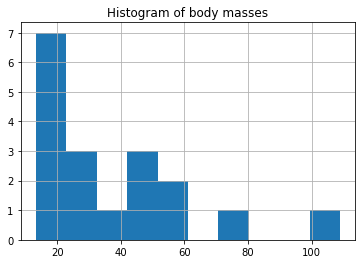

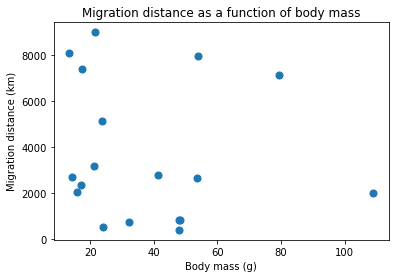

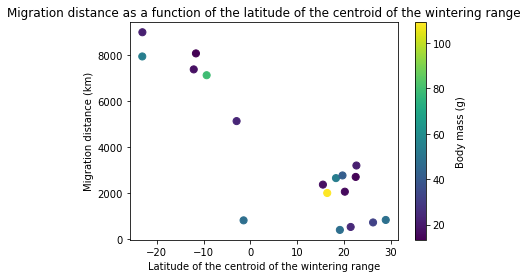

In [66]:
# Added
plot_dist_lat_masses(df_a_i_na_h_added)

In [67]:
print(df_a_i_na_h_added['distance'].mean())
print(df_a_i_na_h_added['distance'].median())

3487.6775703937096
2656.17059769071


In [68]:
df_a_i_na_h_added[['common_name', 'distance']].sort_values(by='distance', ascending=False)

,common_name,distance
11,Cliff Swallow,8972.354593
14,Bank Swallow,8056.133802
13,Purple Martin,7924.070970
9,Barn Swallow,7363.729821
7,Common Nighthawk,7111.696950
4,Chimney Swift,5124.885184
16,Tree Swallow,3201.426202
8,Black Swift,2771.573029
17,Violet-green Swallow,2707.419196
3,Eastern Whip-poor-will,2656.170598


In [69]:
df_a_i_na_h_added.head(2)

,scientific_name,LON.b,LAT.b,LON.nb,LAT.nb,MAX.LAT.nb,distance,intersect,id,avibase id,rank,common_name,french_name,order,family,subfamily,genus,annotation,status_accidental,status_hawaiian,status_introduced,status_nonbreeding,status_extinct,status_misplaced,order_birds_of_north_america,body_mass
0,Aeronautes saxatalis,-108.698701,32.448050,-105.931063,26.265097,39.513228,736.046352,0.586364,755,B401C2DDB3ED732D,species,White-throated Swift,Martinet à gorge blanche,Apodiformes,Apodidae,Apodinae,Aeronautes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes,32.1
1,Antrostomus carolinensis,-88.058904,34.063816,-83.140011,16.459749,30.354784,2011.374172,0.049623,718,8D3E887123F5C670,species,Chuck-will's-widow,Engoulevent de Caroline,Caprimulgiformes,Caprimulgidae,Caprimulginae,Antrostomus,Monotypic.,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes,109.0


In [70]:
df_a_i_na_h_added_fewer_fields = df_a_i_na_h_added[
    ['common_name', 'scientific_name', 'order_birds_of_north_america', 'family', 'body_mass', 'distance']]

In [71]:
df_a_i_na_h_added_fewer_fields['body_mass'] = df_a_i_na_h_added_fewer_fields['body_mass'].round(1)
df_a_i_na_h_added_fewer_fields['distance'] = df_a_i_na_h_added_fewer_fields['distance'].round().astype(int)

/Users/alvastrand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alvastrand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
df_a_i_na_h_added_fewer_fields = df_a_i_na_h_added_fewer_fields.rename(
    columns={'common_name': 'Common Name', 'scientific_name': 'Scientific Name', 
             'order_birds_of_north_america': 'Order', 'family': 'Family', 
             'body_mass': 'Body Mass (g)', 'distance': 'Migration distance (km)'})

In [73]:
df_a_i_na_h_added_fewer_fields = df_a_i_na_h_added_fewer_fields.sort_values(
    by=['Order', 'Family', 'Scientific Name'])

In [74]:
df_a_i_na_h_added_fewer_fields.head(2)

,Common Name,Scientific Name,Order,Family,Body Mass (g),Migration distance (km)
0,White-throated Swift,Aeronautes saxatalis,Caprimulgiformes,Apodidae,32.1,736
4,Chimney Swift,Chaetura pelagica,Caprimulgiformes,Apodidae,23.6,5125


In [75]:
df_a_i_na_h_added_fewer_fields

,Common Name,Scientific Name,Order,Family,Body Mass (g),Migration distance (km)
0,White-throated Swift,Aeronautes saxatalis,Caprimulgiformes,Apodidae,32.1,736
4,Chimney Swift,Chaetura pelagica,Caprimulgiformes,Apodidae,23.6,5125
5,Vaux's Swift,Chaetura vauxi,Caprimulgiformes,Apodidae,17.1,2374
8,Black Swift,Cypseloides niger,Caprimulgiformes,Apodidae,41.4,2772
1,Mexican Whip-poor-will,Antrostomus arizonae,Caprimulgiformes,Caprimulgidae,NaN,564
1,Chuck-will's-widow,Antrostomus carolinensis,Caprimulgiformes,Caprimulgidae,109.0,2011
2,Buff-collared Nightjar,Antrostomus ridgwayi,Caprimulgiformes,Caprimulgidae,48.0,412
3,Eastern Whip-poor-will,Antrostomus vociferus,Caprimulgiformes,Caprimulgidae,53.4,2656
6,Lesser Nighthawk,Chordeiles acutipennis,Caprimulgiformes,Caprimulgidae,47.8,827
7,Common Nighthawk,Chordeiles minor,Caprimulgiformes,Caprimulgidae,79.3,7112


In [76]:
subdir = 'data/output/'

# filename = 'obligate_aerial_insectivores_birdlife_nacc_north_america_handbook_added.csv'
filename = 'aerial_insectivores_migration_distances_mean_weighted_body_masses.csv'

df_a_i_na_h_added.to_csv(subdir + filename, index=False)

In [77]:
subdir = 'data/output/'

filename = 'aerial_insectivores_migration_distances_mean_weighted_body_masses_proposal.csv'

df_a_i_na_h_added_fewer_fields.to_csv(subdir + filename, index=False)

In [78]:
# subdir = 'data/output/'
# filename = 'obligate_aerial_insectivores_birdlife_nacc_north_america_handbook_added.csv'
# df_a_i_na_h_added = pd.read_csv(subdir + filename)